In [1]:
%matplotlib inline
from pprint import pprint

import plot
from simulate import simulate_withdrawals
from harvesting import N_60_RebalanceHarvesting, N_100_RebalanceHarvesting
import harvesting

import itertools
from decimal import Decimal
from montecarlo import conservative

/Users/justus/anaconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


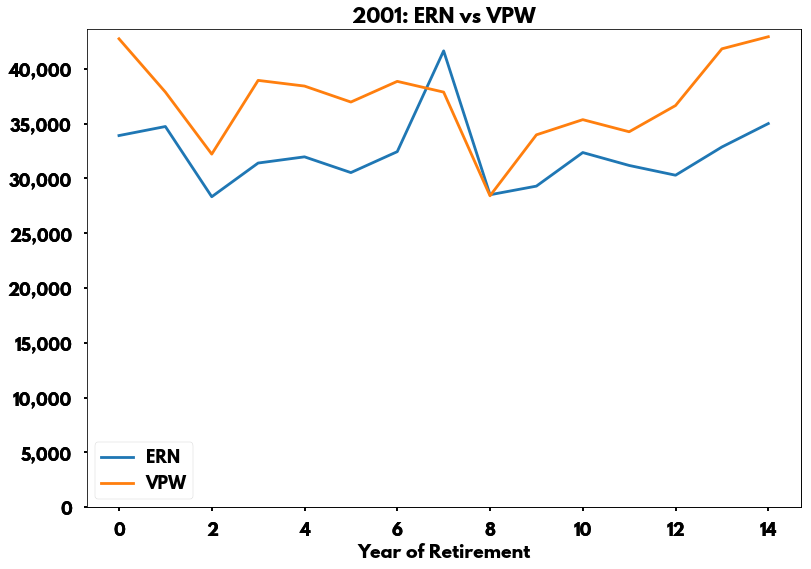

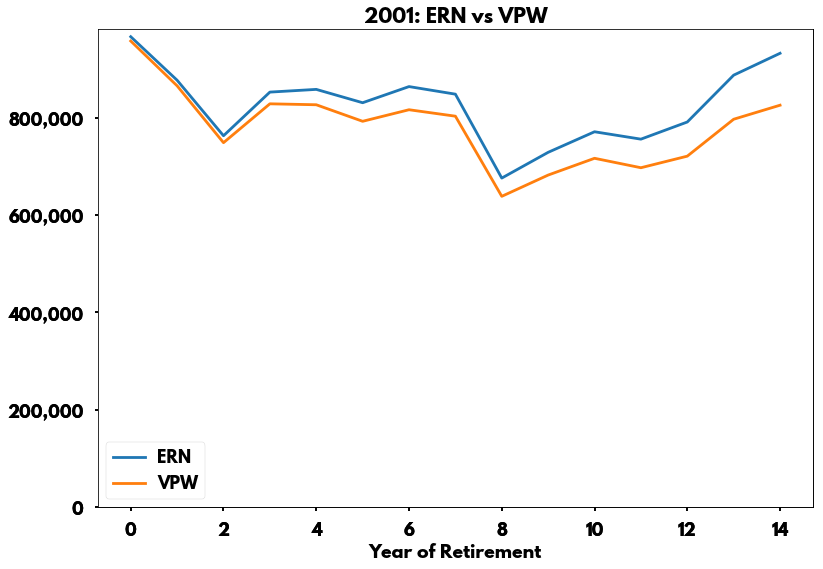

In [28]:
import math
from market import Returns_US_1871
import withdrawal

START_YEAR = 2001

def CAPEPercentage(p, h):
    return withdrawal.CAPEPercentage(p, h, start_year=START_YEAR, a=.0208, b=0.4)

def VPW(p, h):
    return withdrawal.VPW(p, h, years_left=50)

def compare_em_vs_vpw(series, years=40, title=''):
    (r1, r2) = itertools.tee(series)
    portfolio = (600000, 400000)
    x = simulate_withdrawals(r1, years=years, harvesting=N_60_RebalanceHarvesting, withdraw=CAPEPercentage, portfolio=portfolio)
    y = simulate_withdrawals(r2, years=years, harvesting=N_60_RebalanceHarvesting, withdraw=VPW, portfolio=portfolio)

    plot.plot_n({'ERN' : [n.withdraw_r for n in x], 'VPW' : [n.withdraw_r for n in y]}, 'Year of Retirement', title)
    plot.plot_n({'ERN' : [n.portfolio_r for n in x], 'VPW' : [n.portfolio_r for n in y]}, 'Year of Retirement', title)
    
def ern_vs_vpw(year, years=40):
    compare_em_vs_vpw(Returns_US_1871().iter_from(year), title='%d: ERN vs VPW' % year, years=years)

ern_vs_vpw(START_YEAR, years=15)